# Parameters

In [57]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin

label_size = 20

In [58]:
from numpy import sqrt

In [59]:
import time
from numba import jit
from numpy import sin, cos

T0=time.time()

In [60]:
t_final=80

In [61]:
#Parameters

Theta=np.pi/2
Phi=0


#Number of atoms

N=20


gr=1

DeltaR=0

chiR=0
chiL=0






gR=1
DeltaR=0
KapR= 15 *gR*sqrt(( (cos(Theta/2))**2 )*N)

fractionR=0.95
OmegaR= fractionR*(2*(gR**2)*( (cos(Theta/2))**2 )*N/(KapR+1e-10))


gL=1
DeltaL=0   
KapL=15 *gL*sqrt(( (sin(Theta/2))**2 )*N)

fractionL=0.95
OmegaL= fractionL*(2*(gL**2)*( (sin(Theta/2))**2 )*N/(KapL+1e-10))

# Hamiltonian

In [62]:
GammaR=2*(OmegaR/fractionR)/(N* (cos(Theta/2))**2 )
GammaL=2*(OmegaR/fractionR)/(N*(sin(Theta/2))**2)


In [63]:
print(chiR,chiL,OmegaR,OmegaL,GammaR,GammaL)

0 0 0.40055517028715026 0.4005551702871502 0.084327404270979 0.08432740427097903


In [64]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import sqrt

import time
from numba import jit




from scipy.sparse import identity
from scipy.sparse import lil_matrix
from scipy.sparse import csr_matrix


# Definition of Dicke-Generalized States

import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt


#--------------------------------------

State_List=[]

import scipy.special

#Number of generalized Dicke states

N_Dicke=int(scipy.special.binom(N+3, 3))




import time 


T0=time.time()


import itertools
from itertools import permutations
from numba import jit


def List_Dicke(N=N):
    Gen_Dicke_List=[]

    for n0 in range(N):
        for n1 in range(N-n0):
            for n2 in range(N-n0-n1):
                Gen_Dicke_List.append([n0,n1,n2,N-n0-n1-n2])
            
    St_List=[]
    
    for j in Gen_Dicke_List:
        for k in list(permutations(j)):
            St_List.append(list(k))

    St_List.sort(reverse=True)
    Final_result=list(St_List for St_List,_ in itertools.groupby(St_List))
    return Final_result



List_results=List_Dicke(N)


Indexer_func=[1,N,N**2,N**3]

Index_state=[]


for j in List_results:
    Index_state.append([np.dot(j,Indexer_func),j])

Index_state.sort()

Index_States_final=[]


States_sorted=[]


for j in range(len(Index_state)):
    Rep_column=np.zeros((N_Dicke,1))
    Rep_column[j,0]=1
    Index_States_final.append([j,Index_state[j][1],Rep_column])
    States_sorted.append(Index_state[j][1])
    
    
    
T1=time.time()



print(T1-T0)





from scipy.integrate import complex_ode

"""Our system of differential equations belongs to the complex space, that is why we implemented the code suggested in"""
"""https://stackoverflow.com/questions/19910189/scipy-odeint-with-complex-initial-values."""

import time
import numpy as np
from scipy.integrate import odeint


def odeintz(func, z0, t, **kwargs):
   
    
    """An odeint-like function for complex valued differential equations.

    Inputs:
    ----------
      -func: function associated to dr/dt=f(x;t), where x is the set of parameters and variables to be determined
      -z0: 1d array with length N*(5N-1)/2
      -t: 1d array from t=0 to t=tf (parameter set by the user)
      - **kwargs: keyword arguments related with external functions to be used in odeint
    
    Return:
      -z: multivariable array with the solution of the differential equation associated with each variable"""

    
    
    

    # Disallow Jacobian-related arguments.
    _unsupported_odeint_args = ['Dfun', 'col_deriv', 'ml', 'mu']
    bad_args = [arg for arg in kwargs if arg in _unsupported_odeint_args]
    if len(bad_args) > 0:
        raise ValueError("The odeint argument %r is not supported by "
                         "odeintz." % (bad_args[0],))

    # Make sure z0 is a numpy array of type np.complex128.
    z0 = np.array(z0, dtype=np.complex128, ndmin=1)

    def realfunc(x, t, *args):
        z = x.view(np.complex128)
        dzdt = func(z, t, *args)
        # func might return a python list, so convert its return
        # value to an array with type np.complex128, and then return
        # a np.float64 view of that array.
        return np.asarray(dzdt, dtype=np.complex128).view(np.float64)

    result = odeint(realfunc, z0.view(np.float64), t, **kwargs)

    if kwargs.get('full_output', False):
        z = result[0].view(np.complex128)
        infodict = result[1]
        return z, infodict
    else:
        z = result.view(np.complex128)
        return z

## Description of operators

def dagger(A):
    return np.transpose(np.conjugate(A))



def allow(i,j):
    arr_fin=np.array(States_sorted[j])-np.array(States_sorted[i])
    if np.abs(arr_fin[0])<2:
        if np.abs(arr_fin[1])<2:
            if np.abs(arr_fin[2])<2:
                if np.abs(arr_fin[3])<2:
                    return True

### $R^+=\sum_i   \left| 3 \right>\!\!\left< 0 \right|_i$

T0=time.time()

Spar_Hamil_Plus03=lil_matrix((N_Dicke,N_Dicke))

#@jit

def Plus03(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Plus03_state=np.zeros((N_Dicke,1))
    

    if n0!=0 and n3!=N:
        index=States_sorted.index([n0-1,n1,n2,n3+1])
        Vecto_Rep=np.array(Index_States_final[index][2])
        Plus03_state=Plus03_state+sqrt(n0*(n3+1))*Vecto_Rep
              
    
    return Plus03_state


#@jit
def fun03M():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Plus03(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Plus03[i,j]=a_dot
    return Spar_Hamil_Plus03
        


    
Plus03M=fun03M()
Minus03M=dagger(Plus03M)

T1=time.time()

print(T1-T0)



### $L^+=\sum_i   \left| 2 \right>\!\!\left< 1 \right|_i$



# H_2=\omega_R*R_x+\omega_L*L_x

T0=time.time()

Spar_Hamil_Plus12=lil_matrix((N_Dicke,N_Dicke))

#@jit

def Plus12(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Plus12_state=np.zeros((N_Dicke,1))
    

    if n1!=0 and n2!=N:
        index=States_sorted.index([n0,n1-1,n2+1,n3])
        Vecto_Rep=np.array(Index_States_final[index][2])
        Plus12_state=Plus12_state+sqrt(n1*(n2+1))*Vecto_Rep
              
    
    return Plus12_state


        
def fun12M():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Plus12(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Plus12[i,j]=a_dot
    return Spar_Hamil_Plus12

    
Plus12M =fun12M()
Minus12M=dagger(Plus12M)

T1=time.time()

print(T1-T0)




## $G^+=\sum_i   \left| 1 \right>\!\!\left< 0 \right|_i$

# H_2=\omega_R*R_x+\omega_L*L_x

T0=time.time()

Spar_Hamil_Plus01=lil_matrix((N_Dicke,N_Dicke))

#@jit

def Plus01(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Plus01_state=np.zeros((N_Dicke,1))
    

    if n0!=0 and n1!=N:
        index=States_sorted.index([n0-1,n1+1,n2,n3])
        Vecto_Rep=np.array(Index_States_final[index][2])
        Plus01_state=Plus01_state+sqrt(n0*(n1+1))*Vecto_Rep
              
    
    return Plus01_state


#@jit
def fun01M():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Plus01(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Plus01[i,j]=a_dot
    return Spar_Hamil_Plus01
        


    
Plus01M =fun01M()
Minus01M=dagger(Plus01M)

T1=time.time()

print(T1-T0)



## $G^+=\sum_i   \left| 1 \right>\!\!\left< 0 \right|_i$

# H_2=\omega_R*R_x+\omega_L*L_x

T0=time.time()

Spar_Hamil_Plus01=lil_matrix((N_Dicke,N_Dicke))

#@jit

def Plus01(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Plus01_state=np.zeros((N_Dicke,1))
    

    if n0!=0 and n1!=N:
        index=States_sorted.index([n0-1,n1+1,n2,n3])
        Vecto_Rep=np.array(Index_States_final[index][2])
        Plus01_state=Plus01_state+sqrt(n0*(n1+1))*Vecto_Rep
              
    
    return Plus01_state


#@jit
def fun01M():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Plus01(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Plus01[i,j]=a_dot
    return Spar_Hamil_Plus01
        


    
Plus01M =fun01M()
Minus01M=dagger(Plus01M)

T1=time.time()

print(T1-T0)









# H_2=\omega_R*R_x+\omega_L*L_x

T0=time.time()

Spar_Hamil_Plus23=lil_matrix((N_Dicke,N_Dicke))

#@jit

def Plus23(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Plus23_state=np.zeros((N_Dicke,1))
    

    if n2!=0 and n3!=N:
        index=States_sorted.index([n0,n1,n2-1,n3+1])
        Vecto_Rep=np.array(Index_States_final[index][2])
        Plus23_state=Plus23_state+sqrt(n2*(n3+1))*Vecto_Rep
              
    
    return Plus23_state


#@jit
def fun23M():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Plus23(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Plus23[i,j]=a_dot
    return Spar_Hamil_Plus23


    
Plus23M =fun23M()
Minus23M=dagger(Plus23M)

T1=time.time()

print(T1-T0)




## $M^+=\sum_i   \left| 2 \right>\!\!\left< 0 \right|_i$

from numba import jit

# H_2=\omega_R*R_x+\omega_L*L_x

T0=time.time()

Spar_Hamil_Plus02=lil_matrix((N_Dicke,N_Dicke))

#@jit

def Plus02(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Plus02_state=np.zeros((N_Dicke,1))
    

    if n0!=0 and n2!=N:
        index=States_sorted.index([n0-1,n1,n2+1,n3])
        Vecto_Rep=np.array(Index_States_final[index][2])
        Plus02_state=Plus02_state+sqrt(n0*(n2+1))*Vecto_Rep
              
    
    return Plus02_state


#@jit


def fun02M():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Plus02(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Plus02[i,j]=a_dot
    return Spar_Hamil_Plus02
        
    
Plus02M =fun02M()
Minus02M=dagger(Plus02M)

T1=time.time()

print(T1-T0)





## $P^+=\sum_i   \left| 3 \right>\!\!\left< 1 \right|_i$



# H_2=\omega_R*R_x+\omega_L*L_x

T0=time.time()

Spar_Hamil_Plus13=lil_matrix((N_Dicke,N_Dicke))

#@jit

def Plus13(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Plus13_state=np.zeros((N_Dicke,1))
    

    if n1!=0 and n3!=N:
        index=States_sorted.index([n0,n1-1,n2,n3+1])
        Vecto_Rep=np.array(Index_States_final[index][2])
        Plus13_state=Plus13_state+sqrt(n1*(n3+1))*Vecto_Rep
              
    
    return Plus13_state


#@jit
def fun13M():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Plus13(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Plus13[i,j]=a_dot
    return Spar_Hamil_Plus13


    
Plus13M =fun13M()
Minus13M=dagger(Plus13M)

T1=time.time()

print(T1-T0)





t0=time.time()


Spar_Hamil_Z3=lil_matrix((N_Dicke,N_Dicke))

def Z3(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    
    Z3_state=np.zeros((N_Dicke,1))
    
    

    index=States_sorted.index([n0,n1,n2,n3])
    Vecto_Rep=np.array(Index_States_final[index][2])
    Z3_state=Z3_state+n3*(n0+1)*Vecto_Rep
    

    
    return Z3_state

def Z3f():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Z3(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Z3[i,j]=a_dot
    return Spar_Hamil_Z3

                
        

Z3M=Z3f()

t1=time.time()

print(t1-t0)




t0=time.time()


Spar_Hamil_Z2=lil_matrix((N_Dicke,N_Dicke))

def Z2(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    

    index=States_sorted.index([n0,n1,n2,n3])
    Vecto_Rep=np.array(Index_States_final[index][2])
    
    return n2*(n1+1)*Vecto_Rep


def Z2f():
    for i in range(N_Dicke):
        index_req=Index_States_final[i][2]
        for j in range(N_Dicke):
            if allow(i,j)==True:                
                a_dot=np.dot(np.transpose(index_req),Z2(States_sorted[j]))[0][0]
                if a_dot!=0:
                    Spar_Hamil_Z2[i,j]=a_dot
    return Spar_Hamil_Z2
        

Z2M=Z2f()

t1=time.time()

print(t1-t0)







t0=time.time()

Spar_Hamil_Z00=lil_matrix((N_Dicke,N_Dicke))

def Z00(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    

    index=States_sorted.index([n0,n1,n2,n3])
    Vecto_Rep=np.array(Index_States_final[index][2])
    
    return n0*Vecto_Rep





def Z00f():
    for i in range(N_Dicke):
        index_i=Index_States_final[i][2]
        a_dot=np.dot(np.transpose(index_i),Z00(States_sorted[i]))[0][0]
        if a_dot!=0:
            Spar_Hamil_Z00[i,i]=a_dot
    
    return Spar_Hamil_Z00




Spar_Hamil_Z11=lil_matrix((N_Dicke,N_Dicke))

def Z11(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    

    index=States_sorted.index([n0,n1,n2,n3])
    Vecto_Rep=np.array(Index_States_final[index][2])
    
    return n1*Vecto_Rep





def Z11f():
    for i in range(N_Dicke):
        index_i=Index_States_final[i][2]
        a_dot=np.dot(np.transpose(index_i),Z11(States_sorted[i]))[0][0]
        if a_dot!=0:
            Spar_Hamil_Z11[i,i]=a_dot
    
    return Spar_Hamil_Z11







Spar_Hamil_Z22=lil_matrix((N_Dicke,N_Dicke))

def Z22(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    

    index=States_sorted.index([n0,n1,n2,n3])
    Vecto_Rep=np.array(Index_States_final[index][2])
    
    return n2*Vecto_Rep





def Z22f():
    for i in range(N_Dicke):
        index_i=Index_States_final[i][2]
        a_dot=np.dot(np.transpose(index_i),Z22(States_sorted[i]))[0][0]
        if a_dot!=0:
            Spar_Hamil_Z22[i,i]=a_dot
    
    return Spar_Hamil_Z22








#---------------------------------------------------------

Spar_Hamil_Z33=lil_matrix((N_Dicke,N_Dicke))

def Z33(State_rep):
    
    n0=State_rep[0]
    n1=State_rep[1]
    n2=State_rep[2]
    n3=N-n2-n1-n0
    

    index=States_sorted.index([n0,n1,n2,n3])
    Vecto_Rep=np.array(Index_States_final[index][2])
    
    return n3*Vecto_Rep





def Z33f():
    for i in range(N_Dicke):
        index_i=Index_States_final[i][2]
        a_dot=np.dot(np.transpose(index_i),Z33(States_sorted[i]))[0][0]
        if a_dot!=0:
            Spar_Hamil_Z33[i,i]=a_dot
    
    return Spar_Hamil_Z33



Z00=Z00f()
Z11=Z11f()
Z22=Z22f()
Z33=Z33f()

t1=time.time()

print(t1-t0)






from numpy import sin, cos


from scipy.sparse import identity

# Hamiltonian


H=chiR*Z3M+chiL*Z2M+(OmegaR/2)*(Plus03M+Minus03M)+(OmegaL/2)*(Plus12M+Minus12M)
IdentN= identity(N_Dicke)


# Liouvillian

from numba import jit
from scipy import sparse

Liouv=-1j*(sparse.kron(H, IdentN)-sparse.kron(IdentN,H))
Liouv+=(GammaR/2)*(2*sparse.kron(Minus03M, Minus03M)-sparse.kron(Z3M,IdentN)-sparse.kron(IdentN,Z3M))
Liouv+=(GammaL/2)*(2*sparse.kron(Minus12M, Minus12M)-sparse.kron(Z2M,IdentN)-sparse.kron(IdentN,Z2M))





"""


import numpy as np
import matplotlib.pyplot as plt

plt.imshow( np.real(Liouv)  )
plt.colorbar()
plt.show()


"""



## Initial State $\left|\psi\left(0\right) \right>=\left(  \cos\left(\frac{\theta}{2}\right)\left|0 \right>+\rm{exp}\left(\rm{i}\phi \right) \sin\left(\frac{\theta}{2}\right)\left|1 \right> \right)^{\otimes N}$



from numpy import sin, cos, exp

Psi_init=lil_matrix((N_Dicke,1),dtype='complex')

for j in range(N+1):
    a=((cos(Theta/2))**(N-j))*((sin(Theta/2)*exp(1j*Phi))**j)*sqrt(int(scipy.special.binom(N, j))) 
    if a!=0:
        Psi_init[j,0]=a



Fin_rho_in=np.dot(Psi_init,np.transpose(np.conjugate(Psi_init)))

Rho_vector_init=Fin_rho_in.toarray().flatten()


time_grid=np.linspace(0,10,1001)





from numpy import transpose

# Operators 



def reshaper(Array):
    return csr_matrix.reshape(Array,(N_Dicke**2,1),order='C')

from scipy.sparse import csc_matrix
from scipy.sparse.linalg import expm

#Aexp = expm(csc_matrix(Liouv))
Rho_init_col=np.transpose(csr_matrix(Rho_vector_init))

Op01x=0.5*(Plus01M+Minus01M)
Op02x=0.5*(Plus02M+Minus02M)
Op03x=0.5*(Plus03M+Minus03M)
Op12x=0.5*(Plus12M+Minus12M)
Op13x=0.5*(Plus13M+Minus13M)
Op23x=0.5*(Plus23M+Minus23M)

Op01y=0.5*(Plus01M-Minus01M)/(1j)
Op02y=0.5*(Plus02M-Minus02M)/(1j)
Op03y=0.5*(Plus03M-Minus03M)/(1j)
Op12y=0.5*(Plus12M-Minus12M)/(1j)
Op13y=0.5*(Plus13M-Minus13M)/(1j)
Op23y=0.5*(Plus23M-Minus23M)/(1j)



List_X=[reshaper(Op01x),reshaper(Op02x),reshaper(Op03x),reshaper(Op12x),reshaper(Op13x),reshaper(Op23x)]
List_Y=[reshaper(Op01y),reshaper(Op02y),reshaper(Op03y),reshaper(Op12y),reshaper(Op13y),reshaper(Op23y)]
List_Z=[reshaper(Z00),reshaper(Z11),reshaper(Z22),reshaper(Z33)]



###############TIME DEFINITION

import time 

t0=time.time()

steps=12000


t1=time.time()

print(t1-t0)


t = np.linspace(0, t_final, steps)

######



ti=0
tf=t_final
dt=t_final/steps


time_grid=np.linspace(ti,tf,steps)

def evolution_Eul():
    ArrOper01x=[]
    ArrOper02x=[]
    ArrOper03x=[]
    ArrOper12x=[]
    ArrOper13x=[]
    ArrOper23x=[]

    ArrOper01y=[]
    ArrOper02y=[]
    ArrOper03y=[]
    ArrOper12y=[]
    ArrOper13y=[]
    ArrOper23y=[]

    ArrOper0z=[]
    ArrOper1z=[]
    ArrOper2z=[]
    ArrOper3z=[]

    Oper01x=List_X[0].reshape(1,N_Dicke**2)
    Oper02x=List_X[1].reshape(1,N_Dicke**2)
    Oper03x=List_X[2].reshape(1,N_Dicke**2)
    Oper12x=List_X[3].reshape(1,N_Dicke**2)
    Oper13x=List_X[4].reshape(1,N_Dicke**2)
    Oper23x=List_X[5].reshape(1,N_Dicke**2)

    Oper01y=List_Y[0].reshape(1,N_Dicke**2)
    Oper02y=List_Y[1].reshape(1,N_Dicke**2)
    Oper03y=List_Y[2].reshape(1,N_Dicke**2)
    Oper12y=List_Y[3].reshape(1,N_Dicke**2)
    Oper13y=List_Y[4].reshape(1,N_Dicke**2)
    Oper23y=List_Y[5].reshape(1,N_Dicke**2)

    Oper0z =List_Z[0].reshape(1,N_Dicke**2)
    Oper1z =List_Z[1].reshape(1,N_Dicke**2)
    Oper2z =List_Z[2].reshape(1,N_Dicke**2)
    Oper3z =List_Z[3].reshape(1,N_Dicke**2)

    #y=list(np.zeros(steps))
    yinit=Rho_init_col
    for j in range(steps):

        ArrOper01x.append(Oper01x.dot(yinit).toarray()[0,0])
        ArrOper02x.append(Oper02x.dot(yinit).toarray()[0,0])
        ArrOper03x.append(Oper03x.dot(yinit).toarray()[0,0])
        ArrOper12x.append(Oper12x.dot(yinit).toarray()[0,0])
        ArrOper13x.append(Oper13x.dot(yinit).toarray()[0,0])
        ArrOper23x.append(Oper23x.dot(yinit).toarray()[0,0])

        ArrOper01y.append(Oper01y.dot(yinit).toarray()[0,0])
        ArrOper02y.append(Oper02y.dot(yinit).toarray()[0,0])
        ArrOper03y.append(Oper03y.dot(yinit).toarray()[0,0])
        ArrOper12y.append(Oper12y.dot(yinit).toarray()[0,0])
        ArrOper13y.append(Oper13y.dot(yinit).toarray()[0,0])
        ArrOper23y.append(Oper23y.dot(yinit).toarray()[0,0])

        ArrOper0z.append(Oper0z.dot(yinit).toarray()[0,0])
        ArrOper1z.append(Oper1z.dot(yinit).toarray()[0,0])
        ArrOper2z.append(Oper2z.dot(yinit).toarray()[0,0])
        ArrOper3z.append(Oper3z.dot(yinit).toarray()[0,0])

        #ybar=y[j]+Liouv*y[j]*dt
        print(100*j/steps,"%")
        yfin=yinit+Liouv*yinit*dt
        yinit=yfin
    
    Finalx=[ArrOper01x,ArrOper02x,ArrOper03x,ArrOper12x,ArrOper13x,ArrOper23x]
    Finaly=[ArrOper01y,ArrOper02y,ArrOper03y,ArrOper12y,ArrOper13y,ArrOper23y]
    Finalz=[ArrOper0z,ArrOper1z,ArrOper2z,ArrOper3z]

    return Finalx, Finaly, Finalz
        
    #return y



Tin=time.time()

A=evolution_Eul()

Tfi=time.time()

print(Tfi-Tin)

Streaming output truncated to the last 5000 lines.
58.34166666666667 %
58.35 %
58.358333333333334 %
58.36666666666667 %
58.375 %
58.38333333333333 %
58.391666666666666 %
58.4 %
58.40833333333333 %
58.416666666666664 %
58.425 %
58.43333333333333 %
58.44166666666667 %
58.45 %
58.458333333333336 %
58.46666666666667 %
58.475 %
58.483333333333334 %
58.49166666666667 %
58.5 %
58.50833333333333 %
58.516666666666666 %
58.525 %
58.53333333333333 %
58.541666666666664 %
58.55 %
58.55833333333333 %
58.56666666666667 %
58.575 %
58.583333333333336 %
58.59166666666667 %
58.6 %
58.608333333333334 %
58.61666666666667 %
58.625 %
58.63333333333333 %
58.641666666666666 %
58.65 %
58.65833333333333 %
58.666666666666664 %
58.675 %
58.68333333333333 %
58.69166666666667 %
58.7 %
58.708333333333336 %
58.71666666666667 %
58.725 %
58.733333333333334 %
58.74166666666667 %
58.75 %
58.75833333333333 %
58.766666666666666 %
58.775 %
58.78333333333333 %
58.791666666666664 %
58.8 %
58.80833333333333 %
58.81666666666667 

## Here Finishes Liouvillian Solution

In [65]:
pip install sdeint

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import random, zeros, sqrt,cos,sin

import matplotlib.pyplot as plt
import numpy as np
import sdeint
import time
from sdeint import itoint, stratint, itoSRI2, stratKP2iS,itoEuler
from numba import jit
import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


import matplotlib
import matplotlib.pyplot as plt

In [67]:
import matplotlib.pyplot as plt
import numpy as np

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

In [68]:
def _check_args(f, G, y0, tspan, dW=None, IJ=None):
    """Do some validation common to all algorithms. Find dimension d and number
    of Wiener processes m.
    """
    if not np.isclose(min(np.diff(tspan)), max(np.diff(tspan))):
        raise SDEValueError('Currently time steps must be equally spaced.')
    # Be flexible to allow scalar equations. convert them to a 1D vector system
    if isinstance(y0, numbers.Number):
        if isinstance(y0, numbers.Integral):
            numtype = np.float64
        else:
            numtype = type(y0)
        y0_orig = y0
        y0 = np.array([y0], dtype=numtype)
        def make_vector_fn(fn):
            def newfn(y, t):
                return np.array([fn(y[0], t)], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        def make_matrix_fn(fn):
            def newfn(y, t):
                return np.array([[fn(y[0], t)]], dtype=numtype)
            newfn.__name__ = fn.__name__
            return newfn
        if isinstance(f(y0_orig, tspan[0]), numbers.Number):
            f = make_vector_fn(f)
        if isinstance(G(y0_orig, tspan[0]), numbers.Number):
            G = make_matrix_fn(G)
    # determine dimension d of the system
    d = len(y0)
    if len(f(y0, tspan[0])) != d:
        raise SDEValueError('y0 and f have incompatible shapes.')
    message = """y0 has length %d. So G must either be a single function
              returning a matrix of shape (%d, m), or else a list of m separate
              functions each returning a column of G, with shape (%d,)""" % (
                  d, d, d)
    if callable(G):
        # then G must be a function returning a d x m matrix
        Gtest = G(y0, tspan[0])
        if Gtest.ndim != 2 or Gtest.shape[0] != d:
            raise SDEValueError(message)
        # determine number of independent Wiener processes m
        m = Gtest.shape[1]
    else:
        # G should be a list of m functions g_i giving columns of G
        G = tuple(G)
        m = len(G)
        Gtest = np.zeros((d, m))
        for k in range(0, m):
            if not callable(G[k]):
                raise SDEValueError(message)
            Gtestk = G[k](y0, tspan[0])
            if np.shape(Gtestk) != (d,):
                raise SDEValueError(message)
            Gtest[:,k] = Gtestk
    message = """From function G, it seems m==%d. If present, the optional
              parameter dW must be an array of shape (len(tspan)-1, m) giving
              m independent Wiener increments for each time interval.""" % m
    if dW is not None:
        if not hasattr(dW, 'shape') or dW.shape != (len(tspan) - 1, m):
            raise SDEValueError(message)
    message = """From function G, it seems m==%d. If present, the optional
              parameter I or J must be an array of shape (len(tspan)-1, m, m)
              giving an m x m matrix of repeated integral values for each
              time interval.""" % m
    if IJ is not None:
        if not hasattr(IJ, 'shape') or IJ.shape != (len(tspan) - 1, m, m):
            raise SDEValueError(message)
    return (d, m, f, G, y0, tspan, dW, IJ)

In [118]:
t_final

80

In [129]:


theta = Theta
phi   = Phi


steps1=120000

tf=t_final
t_alt = np.linspace(0,tf,steps1)



In [130]:
matrix_array=[]

# X matrix


f10x=zeros((4, 4),dtype=complex_)
f10x[0][1]=(1/sqrt(2))
f10x=f10x+transpose(f10x)
matrix_array.append(f10x)

f20x=zeros((4, 4),dtype=complex_)
f20x[2][0]=(1/sqrt(2))
f20x=f20x+transpose(f20x)
matrix_array.append(f20x)

f30x=zeros((4, 4),dtype=complex_)
f30x[3][0]=(1/sqrt(2))
f30x=f30x+transpose(f30x)
matrix_array.append(f30x)

f21x=zeros((4, 4),dtype=complex_)
f21x[2][1]=(1/sqrt(2))
f21x=f21x+transpose(f21x)
matrix_array.append(f21x)

f31x=zeros((4, 4),dtype=complex_)
f31x[3][1]=(1/sqrt(2))
f31x=f31x+transpose(f31x)
matrix_array.append(f31x)

f32x=zeros((4, 4),dtype=complex_)
f32x[3][2]=(1/sqrt(2))
f32x=f32x+transpose(f32x)
matrix_array.append(f32x)

#Y Matrix

f10y=zeros((4, 4),dtype=complex_)
f10y[0][1]=-1j*(1/sqrt(2))
f10y=f10y+conjugate(np.transpose(f10y))
matrix_array.append(f10y)


f20y=zeros((4, 4),dtype=complex_)
f20y[0][2]=-1j*(1/sqrt(2))
f20y=f20y+conjugate(np.transpose(f20y))
matrix_array.append(f20y)


f30y=zeros((4, 4),dtype=complex_)
f30y[0][3]=-1j*(1/sqrt(2))
f30y=f30y+conjugate(np.transpose(f30y))
matrix_array.append(f30y)


f21y=zeros((4, 4),dtype=complex_)
f21y[1][2]=-1j*(1/sqrt(2))
f21y=f21y+conjugate(np.transpose(f21y))
matrix_array.append(f21y)

f31y=zeros((4, 4),dtype=complex_)
f31y[1][3]=-1j*(1/sqrt(2))
f31y=f31y+conjugate(np.transpose(f31y))
matrix_array.append(f31y)

f32y=zeros((4, 4),dtype=complex_)
f32y[2][3]=-1j*(1/sqrt(2))
f32y=f32y+conjugate(np.transpose(f32y))
matrix_array.append(f32y)


#Z matrix

f0z=np.zeros((4, 4),dtype=complex_)
f0z[0][0]=1
matrix_array.append(f0z)


f1z=np.zeros((4, 4),dtype=complex_)
f1z[1][1]=1
matrix_array.append(f1z)


f2z=np.zeros((4, 4),dtype=complex_)
f2z[2][2]=1
matrix_array.append(f2z)




#-----------------------------------------------------------------------------------------------------

Psi_0=zeros((4,1),dtype=complex_)
Psi_0[0][0]=cos(Theta/2)
Psi_0[1][0]=sin(Theta/2)*exp(1j*Phi)


Psi_0_adj=transpose(conjugate(Psi_0))

#--------------------------------

#Averages Vector

Miu=[]

for j in matrix_array:
    Miu.append(matmul(Psi_0_adj,matmul(j,Psi_0))[0][0])

    

Cov_mat=zeros((15, 15),dtype=complex_)

for i in range(15):
    for j in range(15):
        Cov_mat[i][j]=0.5*(matmul(Psi_0_adj,matmul( matmul(matrix_array[i],matrix_array[j])+matmul(matrix_array[j],matrix_array[i]),Psi_0))[0][0])-Miu[i]*Miu[j]        
        

Cov_mat_list=[]

for j in range(15):
    Cov_mat_list.append(list(real(Cov_mat[j])))    
    

from scipy import stats

In [131]:

@jit

def f(y, t):
    
    
    alpRx=y[15]
    alpRy=y[16]
    alpLx=y[17]
    alpLy=y[18]
            
    s10x=y[0]   #x10
    s20x=y[1]   #x20
    s30x=y[2]   #x30  
    s21x=y[3]   #x21 
    s31x=y[4]   #x31
    s32x=y[5]   #x32
            
    s10y=y[6]   #y10
    s20y=y[7]   #y20
    s30y=y[8]   #y30
    s21y=y[9]   #y21
    s31y=y[10]  #y31
    s32y=y[11]  #y32
            
    s0z=y[12]   #z0
    s1z=y[13]   #z1
    s2z=y[14]   #z2
    
    
    

    
    
    dalpRxdt = -DeltaR*alpRy-(KapR/2)*alpRx  +(gR/sqrt(2))*s30y
            
    dalpRydt = DeltaR*alpRx-(KapR/2)*alpRy-(gR/sqrt(2))*s30x
             
    dalpLxdt = -DeltaL*alpLy-(KapL/2)*alpLx+(gL/sqrt(2))*s21y 
        
    dalpLydt = DeltaL*alpLx-(KapL/2)*alpLy-(gL/sqrt(2))*s21x 
         
      
        
    ds10xdt   = (-gR)*(-alpRx*s31y+alpRy*s31x) +(OmegaR/2)*s31y-\
        gL*(-alpLx*s20y+alpLy*s20x)+(OmegaL/2)*s20y
            
    ds20xdt = (-gR)*(-alpRx*s32y+alpRy*s32x) +(OmegaR/2)*s32y+\
        gL*(alpLx*s10y+alpLy*s10x)+(OmegaL/2)*s10y
            
    ds30xdt = (-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
    ds21xdt = (-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
    ds31xdt = gR*(alpRy*s10x-alpRx*s10y)+(-OmegaR/2)*s10y-\
        gL*(alpLx*s32y+alpLy*s32x)+(-OmegaL/2)*s32y    
            
    ds32xdt = gR*(-alpRx*s20y+alpRy*s20x)+(-OmegaR/2)*s20y+\
        gL*(-alpLx*s31y+alpLy*s31x)+(-OmegaL/2)*s31y
        
    ds10ydt = (gR)*(alpRx*s31x+alpRy*s31y)+(OmegaR/2)*s31x-\
        gL*(alpLx*s20x+alpLy*s20y)-(OmegaL/2)*s20x
        
    ds20ydt = (gR)*(alpRx*s32x+alpRy*s32y)+(OmegaR/2)*s32x-\
        gL*(alpLx*s10x-alpLy*s10y)+(-OmegaL/2)*s10x

    ds30ydt = (2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
    ds21ydt = (2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
    ds31ydt = - gR*(alpRx*s10x+alpRy*s10y)-(OmegaR/2)*s10x+\
        gL*(alpLx*s32x-alpLy*s32y)+(OmegaL/2)*s32x
            
    ds32ydt = (-gR)*(alpRx*s20x+alpRy*s20y)-(OmegaR/2)*s20x+\
        gL*(alpLx*s31x+alpLy*s31y)+(OmegaL/2)*s31x
        
    ds0zdt = (sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
    ds1zdt = (sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
    ds2zdt = (-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            


    dzdt = [ds10xdt,ds20xdt,ds30xdt,ds21xdt,ds31xdt,ds32xdt,ds10ydt,ds20ydt,ds30ydt,ds21ydt,ds31ydt,ds32ydt,ds0zdt,ds1zdt,ds2zdt   ,dalpRxdt,dalpRydt,dalpLxdt,dalpLydt]
    return array(dzdt)
    
@jit

def GG(y, t):
    Arr=zeros((1,19))
    Arr[0][-1]=1
    Arr[0][-2]=1
    Arr[0][-3]=1
    Arr[0][-4]=1
    
    return diag(Arr[0])




In [132]:
@jit

def random_vect(KapR=KapR,KapL=KapL):
    Hu=np.zeros((1,19))
    Hu[0][-1]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-2]=np.sqrt(KapL/4)*np.random.normal()
    Hu[0][-3]=np.sqrt(KapR/4)*np.random.normal()
    Hu[0][-4]=np.sqrt(KapR/4)*np.random.normal()
    
    return Hu



In [133]:
Stochastic=1


@jit



def itoEulerImp(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        tn = tspan[n]
        yn = y[n]
        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR,KapL=KapL)
        
        y[n+1] = yn + f(yn, tn)*h + Stochastic*Rand_vectn

    return y



@jit

def SDE_sol():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return itoEulerImp(f, GG, y0, t_alt)

In [136]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_sde(itera=itera,N=N):
    Results =zeros((steps1, 19))
    for j in range(itera):
        Trayec=SDE_sol()
        Results=add(Results,Trayec)
        print(j)
    
    return Results/itera

In [138]:
import time
t0=time.time()

itera=4000

Result_varTWA_Col_SDE = averages_sde(itera=itera,N=N)
#Result_varTWA_Col_TWA = averages_sde(itera=itera,N=N)


t1=time.time()

print(t1-t0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [139]:
Stochastic=0


@jit



def itoEulerImpTWA(f, G, y0, tspan, dW=None):
    
    
    
    """Use the Euler-Maruyama algorithm to integrate the Ito equation
    dy = f(y,t)dt + G(y,t) dW(t)
    where y is the d-dimensional state vector, f is a vector-valued function,
    G is an d x m matrix-valued function giving the noise coefficients and
    dW(t) = (dW_1, dW_2, ... dW_m) is a vector of independent Wiener increments
    Args:
      f: callable(y, t) returning (d,) array
         Vector-valued function to define the deterministic part of the system
      G: callable(y, t) returning (d,m) array
         Matrix-valued function to define the noise coefficients of the system
      y0: array of shape (d,) giving the initial state vector y(t==0)
      tspan (array): The sequence of time points for which to solve for y.
        These must be equally spaced, e.g. np.arange(0,10,0.005)
        tspan[0] is the intial time corresponding to the initial state y0.
      dW: optional array of shape (len(tspan)-1, d). This is for advanced use,
        if you want to use a specific realization of the d independent Wiener
        processes. If not provided Wiener increments will be generated randomly
    Returns:
      y: array, with shape (len(tspan), len(y0))
         With the initial value y0 in the first row
    Raises:
      SDEValueError
    See also:
      G. Maruyama (1955) Continuous Markov processes and stochastic equations
      Kloeden and Platen (1999) Numerical Solution of Differential Equations
    """
    (d, m, f, G, y0, tspan, dW, __) = _check_args(f, G, y0, tspan, dW, None)
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, d), dtype=type(y0[0]))

    y[0] = y0;
    for n in range(0, Ns-1):
        tn = tspan[n]
        yn = y[n]
        
        Rand_vectn=np.sqrt(h)*random_vect(KapR=KapR,KapL=KapL)
        
        y[n+1] = yn + f(yn, tn)*h + Stochastic*Rand_vectn

    return y



@jit

def SDE_sol_TWA():
    
    Sum_TWA=zeros((15,1))

    for j in range(N):
        Sum_TWA=Sum_TWA+random.multivariate_normal(real(Miu), Cov_mat_list, 1).T
    
    y0=list(Sum_TWA.flatten())+[random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5),random.normal(0, 0.5)]
    
    return itoEulerImpTWA(f, GG, y0, t_alt)

In [140]:
from numpy import add
from numba import jit



itera=5000
@jit

def averages_sdeTWA(itera=itera,N=N):
    Results =zeros((steps1, 19))
    for j in range(itera):
        Trayec=SDE_sol_TWA()
        Results=add(Results,Trayec)
        print(j)
    
    return Results/itera

In [141]:
import time
t0=time.time()

itera=4000


Result_var_Col_TWA = averages_sdeTWA(itera=itera,N=N)


t1=time.time()

print(t1-t0)

<ipython-input-140-d0370e31f9b6>:7: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "averages_sdeTWA" failed type inference due to: Invalid use of type(CPUDispatcher(<function SDE_sol_TWA at 0x7ff05dcce8c0>)) with parameters ()

During: resolving callee type: type(CPUDispatcher(<function SDE_sol_TWA at 0x7ff05dcce8c0>))
During: typing of call at <ipython-input-140-d0370e31f9b6> (12)


File "<ipython-input-140-d0370e31f9b6>", line 12:
def averages_sdeTWA(itera=itera,N=N):
    <source elided>
    for j in range(itera):
        Trayec=SDE_sol_TWA()
        ^

  @jit
<ipython-input-140-d0370e31f9b6>:7: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "averages_sdeTWA" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-140-d0370e31f9b6>", line 11:
def averages_sdeTWA(itera=itera,N=N):
    <source elided>
    Resu

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [142]:
from numba import jit

dt = (tf)/steps# Time step.

times = np.linspace(0., tf, steps)


theta=Theta
phi=Phi


mux10, sigmax10 = (N)*cos(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (cos(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
mux20, sigmax20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux30, sigmax30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
mux21, sigmax21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux31, sigmax31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
mux32, sigmax32 = 0                                ,0                                 # mean and standard deviation

muy10, sigmay10 = (N)*sin(phi)*sin(theta)/sqrt(2),sqrt(N)* (   (1- (sin(phi)*sin(theta))**2 )/2  )**0.5 # mean and standard deviation
muy20, sigmay20 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy30, sigmay30 = 0                                ,sqrt(N)*(((cos(theta/2))**2)/2) # mean and standard deviation
muy21, sigmay21 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy31, sigmay31 = 0                                ,sqrt(N)*(((sin(theta/2))**2)/2) # mean and standard deviation
muy32, sigmay32 = 0                                ,0                                 # mean and standard deviation

muz0, sigmaz0 = (N)*(cos(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz1, sigmaz1 = (N)*(sin(theta/2))**2, sqrt(N)*((sin(theta/2))**2)*((cos(theta/2))**2)  # mean and standard deviation
muz2, sigmaz2 = 0                      , 0           # mean and standard deviation


@jit

def trayectory_meanfield(N,Stochastic):
    sqrtdt = 0
    
    Results =zeros((19, steps))
    
    Results[15][0] = 0
    Results[16][0] = 0
    Results[17][0] = 0
    Results[18][0] = 0
    
    
    Results[0][0] =mux10  #x10  
    Results[1][0] =mux20  #x20
    Results[2][0] =mux30  #x30
    Results[3][0] =mux21  #x21
    Results[4][0] =mux31  #x31
    Results[5][0] =mux32  #x32
        
    Results[6][0] =muy10  #y10
    Results[7][0] =muy20  #y20
    Results[8][0] =muy30  #y30
    Results[9][0] =muy21  #y21
    Results[10][0]=muy31  #y31
    Results[11][0]=muy32  #y32
        
    Results[12][0]=muz0  #z0
    Results[13][0]=muz1  #z1
    Results[14][0]=muz2  #z2
    
    
    for t in range(steps-1):
        
        Normal_VA_1=random.randn() #np.random.normal(0, 1)
        Normal_VA_2=random.randn() #np.random.normal(0, 1)
        Normal_VA_3=random.randn() #np.random.normal(0, 1)
        Normal_VA_4=random.randn() #np.random.normal(0, 1)
        
        
        alpRx=Results[15][t]
        alpRy=Results[16][t]
        alpLx=Results[17][t]
        alpLy=Results[18][t]
            
        s10x=Results[0][t]   #x10
        s20x=Results[1][t]   #x20
        s30x=Results[2][t]   #x30  
        s21x=Results[3][t]   #x21 
        s31x=Results[4][t]   #x31
        s32x=Results[5][t]   #x32
            
        s10y=Results[6][t]   #y10
        s20y=Results[7][t]   #y20
        s30y=Results[8][t]   #y30
        s21y=Results[9][t]   #y21
        s31y=Results[10][t]  #y31
        s32y=Results[11][t]  #y32
            
        s0z=Results[12][t]   #z0
        s1z=Results[13][t]   #z1
        s2z=Results[14][t]   #z2
            
        # alpRx=Results[15*N][t]
        # alpRy=Results[15*N+1][t]
        # alpLx=Results[15*N+2][t]
        # alpLy=Results[15*N+3][t]
        
        
        Results[15][t+1] = alpRx-dt*DeltaR*alpRy-dt*(KapR/2)*alpRx+np.sqrt(KapR/4)*sqrtdt * Normal_VA_1 +(gR/sqrt(2))*dt*s30y
            
        Results[16][t+1] = alpRy+dt*DeltaR*alpRx-dt*(KapR/2)*alpRy+np.sqrt(KapR/4)*sqrtdt * Normal_VA_2 -(gR/sqrt(2))*dt*s30x
             
        Results[17][t+1] = alpLx -dt*DeltaL*alpLy-dt*(KapL/2)*alpLx+np.sqrt(KapL/4)*sqrtdt * Normal_VA_3 +(gL/sqrt(2))*dt*s21y 
        
        Results[18][t+1] = alpLy +dt*DeltaL*alpLx-dt*(KapL/2)*alpLy+np.sqrt(KapL/4)*sqrtdt * Normal_VA_4 -(gL/sqrt(2))*dt*s21x 
         
      
        
        Results[0][t+1] = s10x  +dt*(-gR)*(-alpRx*s31y+alpRy*s31x) +dt*(OmegaR/2)*s31y-\
            dt*gL*(-alpLx*s20y+alpLy*s20x)+dt*(OmegaL/2)*s20y
            
        Results[1][t+1] = s20x  +dt*(-gR)*(-alpRx*s32y+alpRy*s32x) +dt*(OmegaR/2)*s32y+\
            dt*gL*(alpLx*s10y+alpLy*s10x)+dt*(OmegaL/2)*s10y
            
        Results[2][t+1] = s30x  +dt*(-sqrt(2)*gR)*alpRy*(N-s2z-s1z-2*s0z)
            
        Results[3][t+1] = s21x  +dt*(-sqrt(2)*gL)*alpLy*(s2z-s1z)
            
        Results[4][t+1] = s31x  +dt*gR*(alpRy*s10x-alpRx*s10y)+dt*(-OmegaR/2)*s10y-\
            dt*gL*(alpLx*s32y+alpLy*s32x)+dt*(-OmegaL/2)*s32y    
            
        Results[5][t+1] = s32x  +dt*gR*(-alpRx*s20y+alpRy*s20x)+dt*(-OmegaR/2)*s20y+\
            dt*gL*(-alpLx*s31y+alpLy*s31x)+dt*(-OmegaL/2)*s31y
        
        Results[6][t+1] = s10y  +dt*(gR)*(alpRx*s31x+alpRy*s31y)+dt*(OmegaR/2)*s31x-\
            dt*gL*(alpLx*s20x+alpLy*s20y)-dt*(OmegaL/2)*s20x
        
        Results[7][t+1] = s20y  +dt*(gR)*(alpRx*s32x+alpRy*s32y)+dt*(OmegaR/2)*s32x-\
            dt*gL*(alpLx*s10x-alpLy*s10y)+dt*(-OmegaL/2)*s10x

        Results[8][t+1] = s30y  +dt*(2*gR*alpRx+OmegaR)*( N-s2z-s1z-2*s0z  )/sqrt(2)
                
        Results[9][t+1] = s21y  +dt*(2*gL*alpLx+OmegaL)*(s2z-s1z)/sqrt(2)
        
        Results[10][t+1] = s31y - dt*gR*(alpRx*s10x+alpRy*s10y)-dt*(OmegaR/2)*s10x+\
            dt*gL*(alpLx*s32x-alpLy*s32y)+dt*(OmegaL/2)*s32x
            
        Results[11][t+1] = s32y + dt*(-gR)*(alpRx*s20x+alpRy*s20y)-dt*(OmegaR/2)*s20x+\
            dt*gL*(alpLx*s31x+alpLy*s31y)+dt*(OmegaL/2)*s31x
        
        Results[12][t+1] = s0z+ dt*(sqrt(2))*(gR*(alpRx*s30y-alpRy*s30x)+ (OmegaR/2)*s30y )
        
        Results[13][t+1] = s1z+ dt*(sqrt(2))*(gL*(alpLx*s21y-alpLy*s21x)+ (OmegaL/2)*s21y )
            
        Results[14][t+1] = s2z+ dt*(-sqrt(2))*(gL*(-alpLy*s21x+alpLx*s21y)+ (OmegaL/2)*s21y )
            

            
    return Results


Mean_field_res=trayectory_meanfield(N,0)



In [143]:
def partit(number,array):
    j=0
    dis=len(array)
    result=[]
    while j*number<dis:
        result.append(array[j*number])
        j=j+1
    return result


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


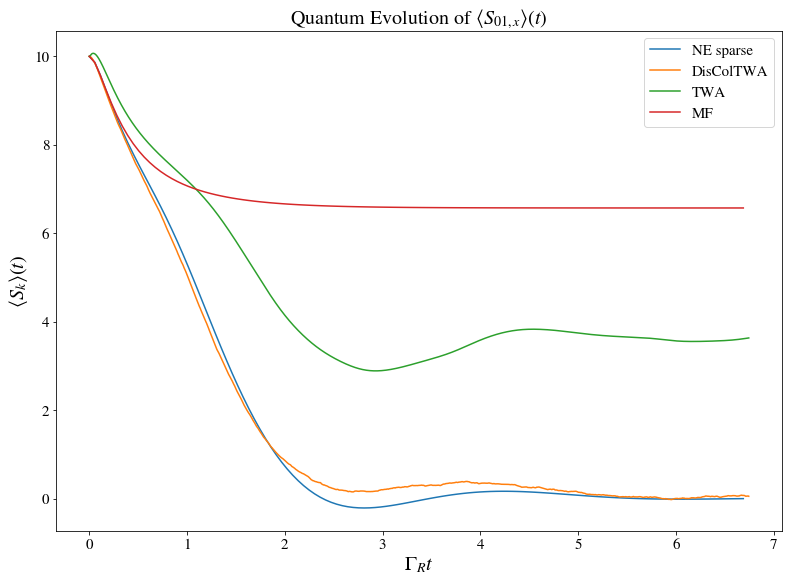

In [144]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{01,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=0

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


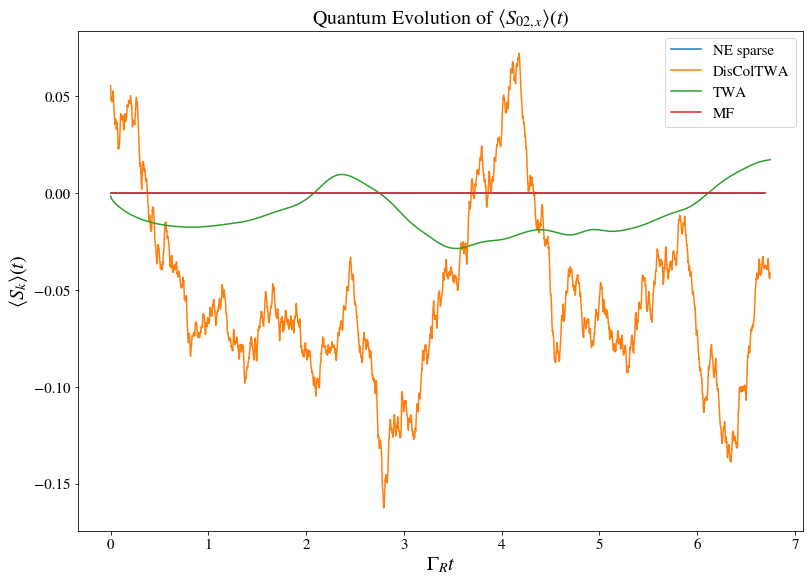

In [145]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{02,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=1

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


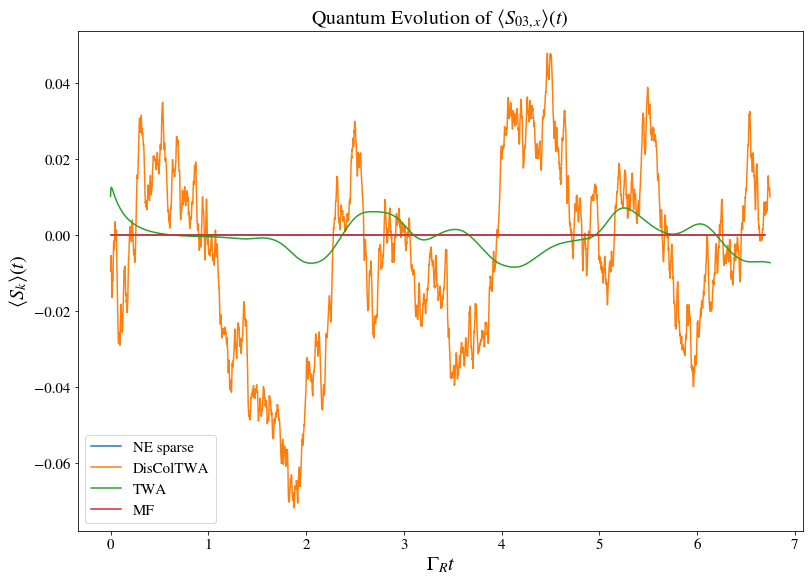

In [146]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{03,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=2

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


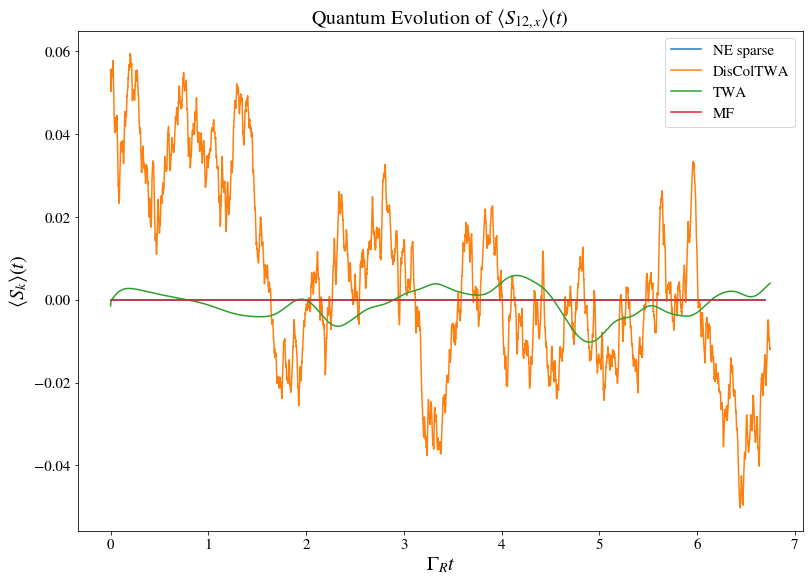

In [147]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{12,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=3

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


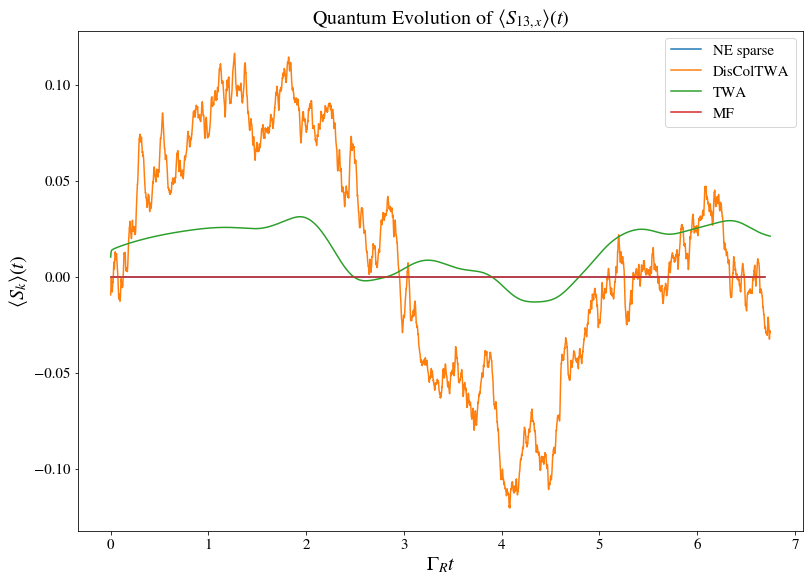

In [148]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{13,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=4

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


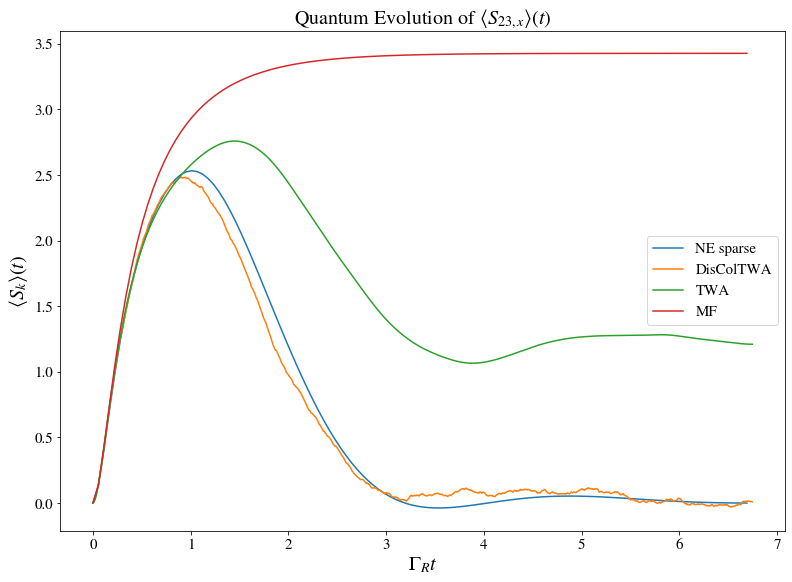

In [149]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{23,x} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=5

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[0][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


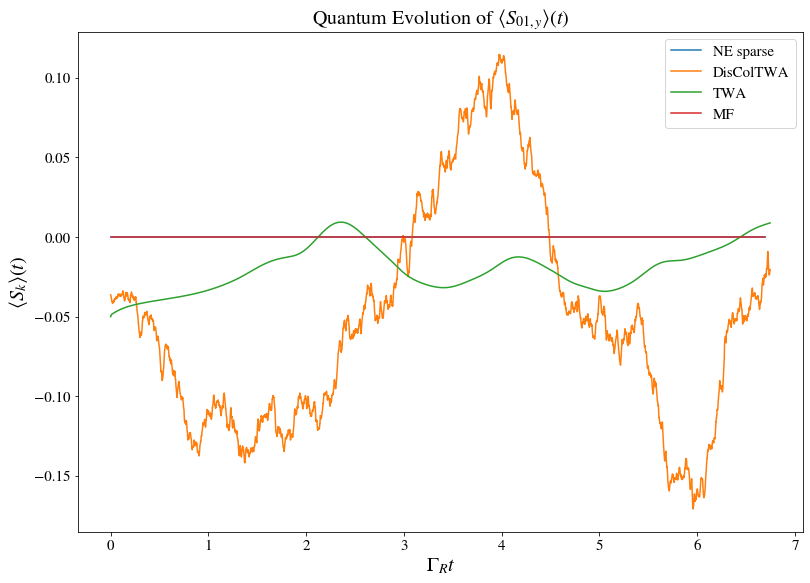

In [150]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{01,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=0

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[1][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+6]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+6]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+6]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


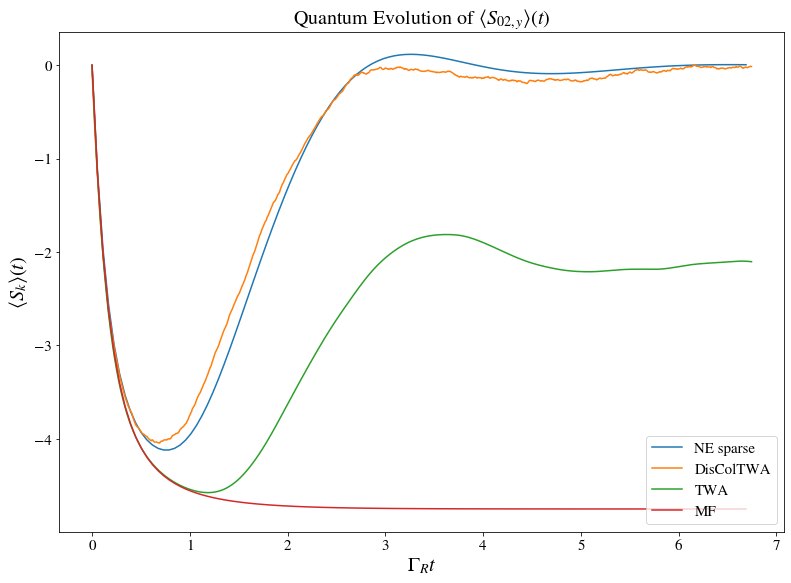

In [151]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{02,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=1

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[1][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+6]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+6]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+6]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


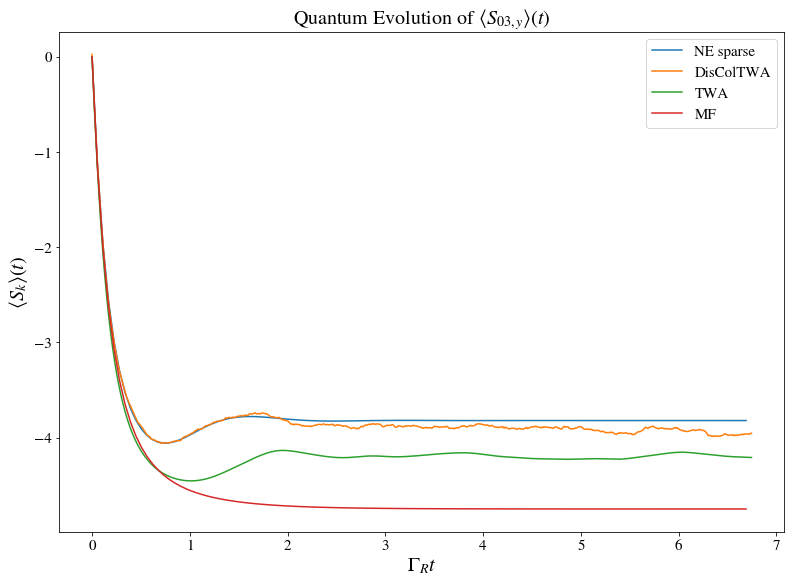

In [152]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{03,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=2

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[1][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+6]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+6]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+6]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


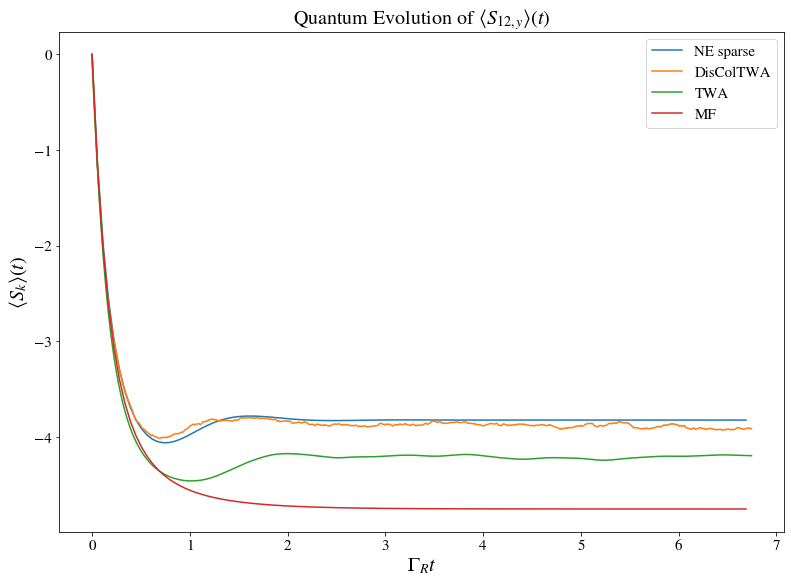

In [153]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{12,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=3

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[1][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+6]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+6]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+6]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


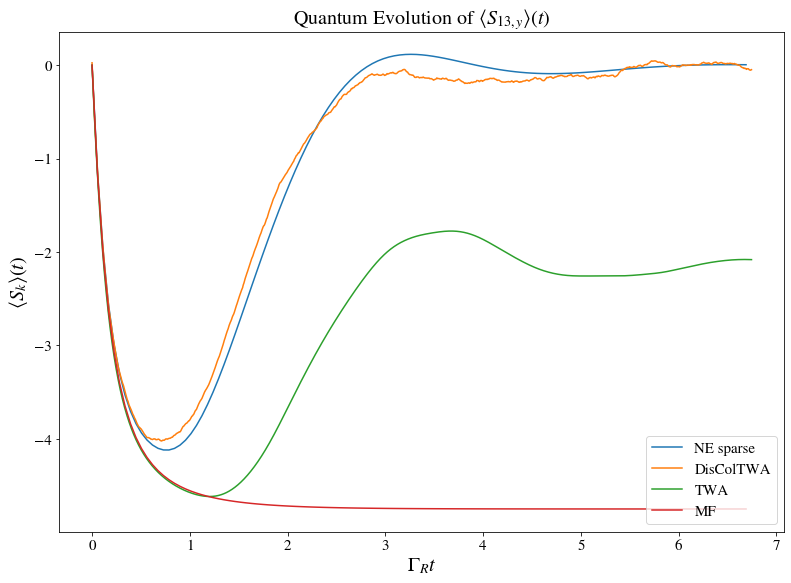

In [154]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{13,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=4

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[1][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+6]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+6]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+6]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


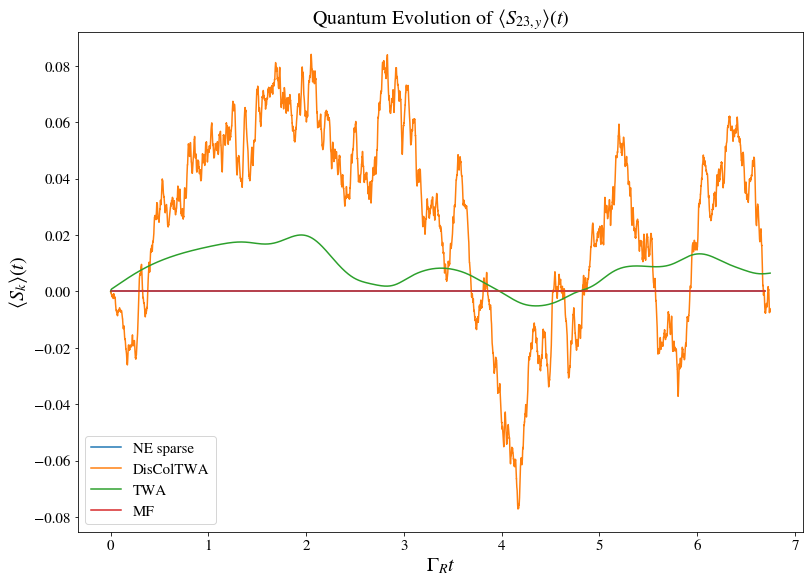

In [155]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle S_{23,y} \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=5

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[1][index]),label="NE sparse")

plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+6]/sqrt(2),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+6]/sqrt(2),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+6]/sqrt(2)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


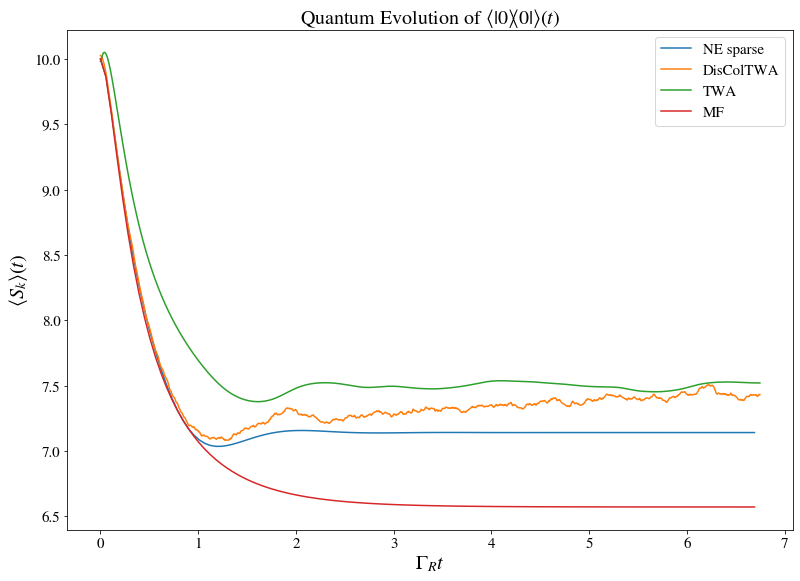

In [156]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 0 \rangle \!\! \langle0 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=0

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[2][index]),label="NE sparse")
plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+12]/sqrt(1),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+12]/sqrt(1),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+12]/sqrt(1)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


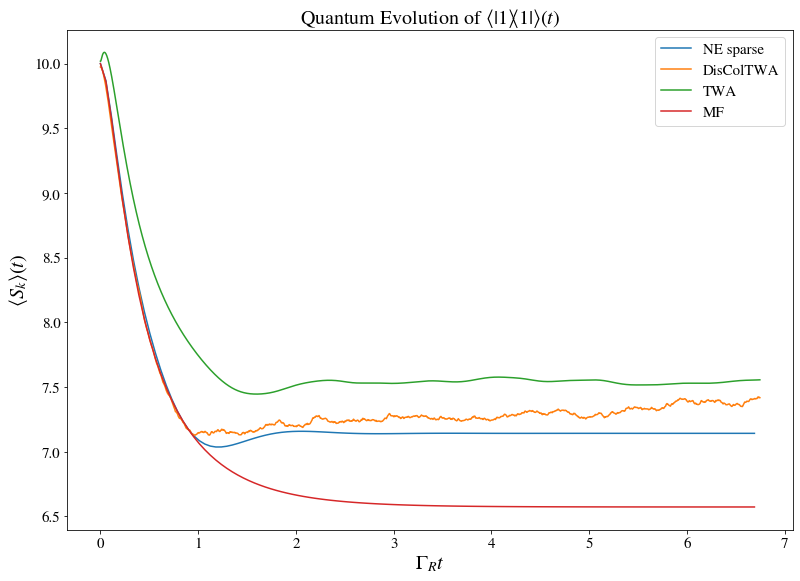

In [157]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 1 \rangle \!\! \langle 1 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=1

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[2][index]),label="NE sparse")
plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+12]/sqrt(1),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+12]/sqrt(1),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+12]/sqrt(1)),label="MF")




plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


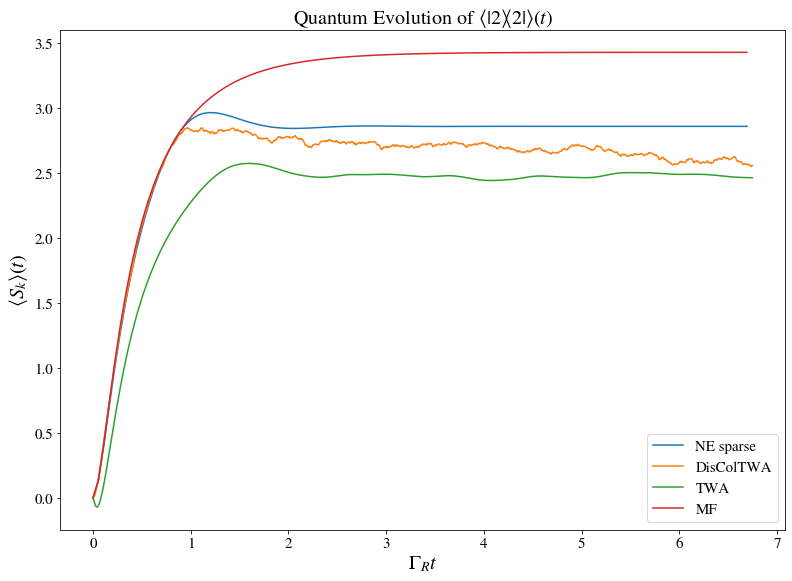

In [158]:



matplotlib.rcParams['figure.figsize'] = (13.0, 9.2)


plt.title(r'Quantum Evolution of $\langle \left| 2 \rangle \!\! \langle 2 \right|  \rangle (t)$', fontsize = label_size)
plt.xlabel(r'$\Gamma_R t$', fontsize = label_size)
#plt.ylabel(r'$\langle a^\dagger a\rangle(t)$', fontsize = label_size)
plt.ylabel(r'$\langle S_k \rangle(t)$', fontsize = label_size)






reductor=100
index=2

label_size = 20

plt.plot(partit(reductor,t*GammaR),partit(reductor,A[2][index]),label="NE sparse")
plt.plot(t_alt*GammaR,Result_varTWA_Col_SDE[:,index+12]/sqrt(1),label="DisColTWA")
#plt.plot(t*GammaR,Result_varTWA_Col_TWA[:,12+index]/sqrt(2),label="$P_1$ TWA")
plt.plot(t_alt*GammaR,Result_var_Col_TWA[:,index+12]/sqrt(1),label="TWA")


plt.plot(partit(reductor,t*GammaR),partit(reductor,Mean_field_res[index+12]/sqrt(1)),label="MF")




plt.legend()